# Assignment 06
EE 538 Spring 2020 <br>
Analog Circuits for Sensor Systems <br>
University of Washington Electrical & Computer Engineering <br>

Due: May 23, 2020 <br>
Author: Kevin Egedy

In [1]:
# Imports
import os
import sys
import cmath
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import ltspice
import sympy as sp
from scipy import signal
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Input-Referred Voltage Noise**

<img src="images/input_voltage_noise.png" width="300">

<hr>

**Input Resistor Noise**

<img src="images/input_resistor_noise.png" width="300">

$$\begin{eqnarray}
&& e_{n1,out} &=& \frac{-R_2}{R_1}e_{n1} \\[0.5em]
&& e_{n1,out}^2 &=& (\frac{R_2}{R_1})^2 4kTR_1 && \frac{V^2}{\text{Hz}}
\end{eqnarray}$$

<hr>

**Feedback Resistor Noise**

<img src="images/feedback_resistor_noise.png" width="300">

$$\begin{eqnarray}
&& e_{n2,out} &=& e_{n2} \\[0.5em]
&& e_{n2,out}^2 &=& 4kTR_2 && \frac{V^2}{\text{Hz}}
\end{eqnarray}$$

<hr>

**Opamp Noise**

<img src="images/opamp_noise.png" width="300">

$$\begin{eqnarray}
&& e_{n,out} &=& (1+\frac{R_2}{R_1})e_{na} \\[0.5em]
&& e_{na,out}^2 &=& (1+\frac{R_2}{R_1})^2 e_{na}^2 && \frac{V^2}{\text{Hz}}
\end{eqnarray}$$

<hr>

<img src="images/HW06Q1.png" width="700">

**Part A**

**Given**: $e_n = \frac{10nV}{\sqrt{\text{Hz}}}, i_n = \frac{1pA}{\sqrt{\text{Hz}}}, f_T = 10\text{MHz}, kT = 4.1145e-21$

$\begin{eqnarray}
&& A_V &=& \frac{1}{\beta} = \frac{-R_f}{R_i} = 10 \\[0.5em]
&& e_{n,out}^2 &=& (\frac{R_f}{R_i})^2 4kTR_i + 4kTR_f + (1+\frac{R_f}{R_i})^2 e_n^2 + (i_n R_f)^2 \\[0.5em]
&& e_{n,out} &=& \sqrt{(\frac{R_f}{R_i})^2 4kTR_i + 4kTR_f + 
(1+\frac{R_f}{R_i})^2 e_n^2 + (i_n R_f)^2} \\[0.5em]
&& e_{n,out} &=& 1.18365 \cdot 10^{-7}  = 118.4 \frac{nV}{\sqrt{\text{Hz}}} \\[0.5em]
&& e_{n,in} &\approx& \frac{e_{n,out}}{1/\beta} \\[0.5em]
&& e_{n,in} &=& 1.18365 \cdot 10^{-8}  = 11.84 \frac{nV}{\sqrt{\text{Hz}}}
\end{eqnarray}$

<hr>

**Part B**

$\begin{eqnarray}
&& A_V &=& \frac{1}{\beta} = \frac{-R_f}{R_i} = 10 \\[0.5em]
&& f_{ENB} &=& \frac{\pi}{2} f_{3dB}  = \frac{\pi}{2} \beta f_T 
\approx 157 \cdot 10^6 \text{Hz} \\[0.5em]
&& v_{n,out(rms)} &=& \sqrt{e_{n,out}^2 \frac{\pi}{2}\beta f_T}  = 
   \sqrt{e_{n,out}^2 f_{ENB}}\\[0.5em]
&& v_{n,in(rms)} &\approx& \frac{v_{n,out(rms)}}{1/\beta} \\[0.5em]
&& &=& \beta \sqrt{e_{n,out}^2 \frac{\pi}{2}f_T} \\[0.5em]
&& &=& \frac{1}{10} \sqrt{(1.18365 \cdot 10^{-7})^2 (157 \cdot 10^6)} =
       0.0001483 = 148.3 \mu V \\[0.5em]
\end{eqnarray}$

<hr>

**Part C**

<img src="images/HW06Q1_Ltspice.png" width="500">

<img src="images/totalRMSnoise.png" width="300">

In [2]:
filepath = 'data/fb_amp_noise.txt'
df = pd.read_csv(filepath)
freq = df['frequency']
mag1 = df['V(inoise)']
mag2 = df['V(onoise)']

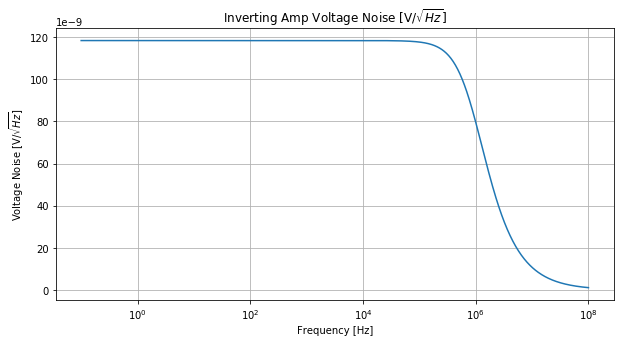

In [3]:
#Plot
fig, ax = plt.subplots(figsize=(10,5))
ax.semilogx(freq, mag2)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Voltage Noise [V/$\sqrt{Hz}$]')
ax.set_title('Inverting Amp Voltage Noise [V/$\sqrt{Hz}$]')
ax.ticklabel_format(style='sci', axis='y', scilimits=(-9,-9))
ax.grid()
#ax.legend()
plt.show();

<img src="images/HW06Q2.png" width="700">

**Part A**

[ADA4898](https://www.analog.com/media/en/technical-documentation/data-sheets/ADA4898-1_4898-2.pdf)
[AD8691](https://www.analog.com/media/en/technical-documentation/data-sheets/AD8691_8692_8694.pdf)

|             | ADA4898 | AD8691  |
|------------:|---------|---------|
| $\beta$ (V/V) | 1     | 1       |
| $i_n$ (pA)  | 2.4     | 0.05    |
| $e_n$ (nA)  | 0.9     | 8       |
| $f_{T}$ (MHz) | 65    | 10      |
| $f_{3dB} = \beta f_{T}$ | 65   | 10      |

<img src="images/ADA4898_noise.png" style="float: left;width=300"><img>

<img src="images/AD8691_noise.png" style="float: right;width=300"><img>


$$\begin{align}
  \begin{array}{ll}
    \text{Noise Bandwidth} \\
    \text{ADA4898: } f_{ENB} = \frac{\pi}{2} f_{3dB}  = 102 \text{MHz} \\
    \text{AD8691: } f_{ENB} = \frac{\pi}{2} f_{3dB}  = 15.7 \text{MHz}
  \end{array}
\end{align}$$

In [4]:
filepath = 'data/ADA4898.txt'
df = pd.read_csv(filepath)
freq = df['frequency']
mag1 = df['V(onoise)']

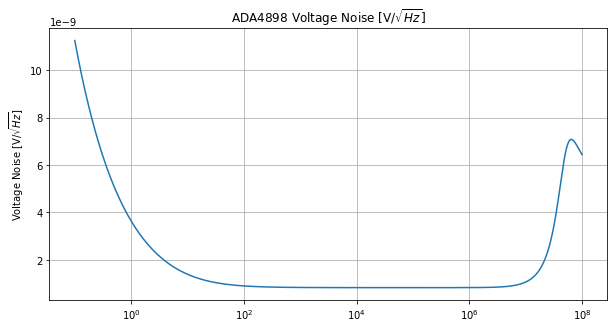

In [5]:
#Plot
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('ADA4898 Voltage Noise [V/$\sqrt{Hz}$]')
ax.semilogx(freq, mag1)
ax.set_ylabel('Voltage Noise [V/$\sqrt{Hz}$]')
ax.ticklabel_format(style='sci', axis='y', scilimits=(-9,-9))
ax.grid()
plt.show();

In [6]:
filepath = 'data/AD8691.txt'
df = pd.read_csv(filepath)
freq = df['frequency']
mag1 = df['V(onoise)']
mag2 = 20*np.log10(df['V(onoise)']/min(df['V(onoise)']))

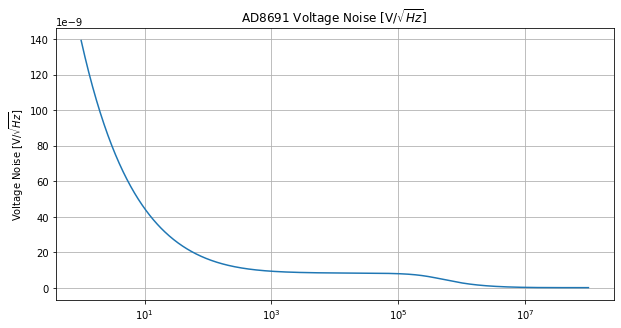

In [7]:
#Plot
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('AD8691 Voltage Noise [V/$\sqrt{Hz}$]')
ax.semilogx(freq, mag1)
ax.set_ylabel('Voltage Noise [V/$\sqrt{Hz}$]')
ax.ticklabel_format(style='sci', axis='y', scilimits=(-9,-9))
ax.grid()
plt.show();

### Part B

$\begin{eqnarray}
&& e_{n,out} &=& \sqrt{e_{n}^2 + R_S^2 i_{n}^2} \frac{V}{\sqrt{\text{Hz}}} 
\end{eqnarray}$

Since $R_S = 0$, then the voltage noise observed is $e_{n}$

**ADA4898**
<img src="images/ADA4898_noise_performance.png" width="700">

**Ltspice**
<img src="images/ADA4898_partB.png" width="500"><img>


| frequency  | V(onoise)     |
|-----------:|---------------|
| 1 kHz      | 0.841671 nV   |

<hr>

**AD8691**
<img src="images/AD8691_noise_performance.png" width="700">

**Ltspice**
<img src="images/AD8691_partB.png" width="500"><img>

| frequency  | V(onoise)     |
|-----------:|---------------|
| 10 Hz      | 44.68291 nV |
| 1 kHz      | 9.387410 nV |
| 10 kHz     | 8.409573 nV |

<hr>

### Part C

**ADA4898**

$$\begin{eqnarray}
&& R_S &=&  10 \cdot \frac{0.9 \text{nV}}{2.4 \text{pA}}
= 3750 \Omega \\[0.5em]
&& e_{n,out} &=& \sqrt{e_{n}^2 + R_S^2 i_{n}^2} \frac{V}{\sqrt{\text{Hz}}} \\[0.5em]
&&           &=& \sqrt{(0.9\text{nV})^2 + 3750^2 (2.4\text{pA})^2} \frac{V} {\sqrt{\text{Hz}}} \\[0.5em]
&&           &=& 9.405 \frac{nV} {\sqrt{\text{Hz}}}
\end{eqnarray}$$

<img src="images/ADA4898_partC.png" width="500"><img>

| frequency  | V(onoise)     |
|-----------:|---------------|
| 1 kHz      | 11.0425 nV   |

<hr>

**AD8691**

$$\begin{eqnarray}
&& R_S &=&  10 \cdot \frac{8 \text{nV}}{0.05 \text{pA}}
= 1.6 \cdot 10^6 \Omega \\[0.5em]
&& e_{n,out} &=& \sqrt{e_{n}^2 + R_S^2 i_{n}^2} \frac{V}{\sqrt{\text{Hz}}} \\[0.5em]
&&           &=& \sqrt{(8\text{nV})^2 + 1.6\text{MHz}^2 (0.05\text{pA})^2} \frac{V} {\sqrt{\text{Hz}}} \\[0.5em]
&&           &=& 80.4 \frac{nV}{\sqrt{\text{Hz}}}
\end{eqnarray}$$

<img src="images/AD8691_partC.png" width="500"><img>

| frequency  | V(onoise)     |
|-----------:|---------------|
| 10 Hz      | 446.8291 nV |
| 1 kHz      | 93.87410 nV |
| 10 kHz     | 84.09573 nV |

<hr>

### Part D

$\begin{eqnarray}
&& v_{n,out(rms)} &=& \sqrt{e_{n,out}^2 \frac{\pi}{2}\beta f_T}  = 
   \sqrt{e_{n,out}^2 f_{ENB}} \rightarrow  \sqrt{e_{n,out}^2 \text{BW}} \\[0.5em]
\end{eqnarray}$

**ADA4898**

<img src="images/ADA4898_totalRMS.png" width="300"><img>

$$\begin{eqnarray}
&& v_{n,out(rms)} &=& \sqrt{e_{n,out}^2 1\text{MHz}} \\[0.5em]
&& &=& e_{n,out} \cdot 10^3,& e_{n,out} = 0.9\text{nV} \\[0.5em]
&& &=& 0.9 \mu \text{V} 
\end{eqnarray}$$

The difference between ideal and actual is $\frac{900-835}{900} = 7.22 \%$. 
<hr>

**AD8691**

<img src="images/AD8691_totalRMS.png" width="300"><img>

$$\begin{eqnarray}
&& v_{n,out(rms)} &=& \sqrt{e_{n,out}^2 1\text{MHz}}\\[0.5em]
&& &=& e_{n,out} \cdot 10^3,& e_{n,out} = 8\text{nV} \\[0.5em]
&& &=& 8 \mu \text{V}
\end{eqnarray}$$

The difference between ideal and actual is $\frac{8-5.55}{8} = 30.63 \%$. This is a large difference that is probably due to the fact that the current noise density is much smaller than the spec value.